# Substitution Ciphers

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Introduction

**Substitution ciphers** are cryptographic algorithms that generate ciphertext by replacing each letters in the plaintext according to a **predefined mapping** between the alphabet and one (or more than one) of its permutations. This mapping serves as the key and must be shared between the sender and receiver, making these algorithms **symmetric**. While simple to implement, substitution ciphers are vulnerable to frequency analysis and other kind of attacks due to their predictable patterns. Despite their limitations, they serve as foundational concepts in cryptography and have historical significance in the development of encryption techniques.

In this notebook Ceasar, Simple Substitution and Vigenere ciphers will be exposed, implementing the respective encryption and decryption functions and breaking them with the most appropriate attack.

## Caesar Cipher

The **Caesar Cipher**, named after Julius Caesar who used it for military communications, is one of the simplest substitution ciphers. In encryption, each letter of the plaintext is **shifted** by a fixed number of positions in the alphabet. Consequently, one can consider as key either the numerical value representing the shift or the permutation corresponding to the shifted alphabet. Decryption is achieved by reversing this process.

### Types of attack of Caesar Cipher

Breaking the Caesar Cipher is often achieved through a **brute force attack**, exhaustively testing all 26 (25 if the identity is not considered) possible key values until a meaningful plaintext is obtained.

Alternatively, a **frequency analysis attack** can be performed comparing **letters distribution** in the ciphertext to that of the native language being used, trying to extract some information about the possible alphabet permutation used to encrypt the plaintext. However, this kind of attack is more suited for more complex substitution ciphers, where the brute force approach cannot be exploited.

### Encryption

In [39]:
# Define the alphabet as a tuple of lowercase letters using ASCII notation
alphabet = tuple(chr(i) for i in range(97, 123))

In [40]:
def caesar_encrypt(plaintext, shift=0):
    # Encrypt `plaintext` (str) as a caesar cipher with a given `shift` (int) 
    ciphertext = ''
    for plain_letter in plaintext:
        if plain_letter.isalpha():
            # Apply Ceasar shift and concatenate the new letter
            ciphertext += alphabet[
                (alphabet.index(plain_letter) + shift) % len(alphabet)]
        else:
            # Add non-alphabetic character as is
            ciphertext += plain_letter
    return ciphertext

In [41]:
# Test the encryption function
plaintext = 'hello!' 
ciphertext = caesar_encrypt(plaintext, shift=4)

# Expected output 'hello! -> lipps!'
print(plaintext, '->', ciphertext)

hello! -> lipps!


### Decryption

In [42]:
def caesar_decrypt(ciphertext, shift=0):
    # Decrypt `ciphertext` (str) as a caesar cipher with a given `shift` (int) 
    plaintext = ''
    for cipher_letter in ciphertext:
        if cipher_letter.isalpha():
            # Apply reverse Ceasar shift and concatenate the new letter
            plaintext += alphabet[
                (alphabet.index(cipher_letter) - shift) % (len(alphabet))]
        else:
            # Add non-alphabetic character as is
            plaintext += cipher_letter
    return plaintext

In [43]:
# Test the decryption function
ciphertext = 'lipps!'
plaintext = caesar_decrypt(ciphertext, shift=4)

# Expected output 'lipps! -> hello!'
print(ciphertext, '->', plaintext)

lipps! -> hello!


### Ciphertext

In [44]:
# Load the ciphertext from the .txt file
with open('ciphertext_caesar.txt', 'r') as f:
    ciphertext_ceasar = f.read()
ciphertext_ceasar

'aucom dofcom wuymul (12 dofs 100 vw - 15 gulwb 44 vw) qum u liguh ayhyluf uhx mnunymguh. u gygvyl iz nby zclmn nlcogpcluny, wuymul fyx nby liguh ulgcym ch nby auffcw qulm vyzily xyzyuncha bcm jifcncwuf lcpuf jigjys ch u wcpcf qul, uhx movmykoyhnfs vywugy xcwnunil zlig 49 vw ohncf bcm ummummchuncih ch 44 vw. by jfusyx u wlcncwuf lify ch nby ypyhnm nbun fyx ni nby xygcmy iz nby liguh lyjovfcw uhx nby lcmy iz nby liguh ygjcly.\nch 60 vw, wuymul, wlummom, uhx jigjys zilgyx nby zclmn nlcogpcluny, uh chzilguf jifcncwuf uffcuhwy nbun xigchunyx liguh jifcncwm zil mypyluf syulm. nbycl unnygjnm ni ugumm jifcncwuf jiqyl qyly ijjimyx vs guhs ch nby myhuny, ugiha nbyg wuni nby siohayl qcnb nby jlcpuny mojjiln iz wcwyli. wuymul limy ni vywigy ihy iz nby gimn jiqylzof jifcncwcuhm ch nby liguh lyjovfcw nblioab u mnlcha iz gcfcnuls pcwnilcym ch nby auffcw qulm, wigjfynyx vs 51 vw, qbcwb alyunfs yrnyhxyx liguh nyllcnils. xolcha nbcm ncgy by vinb chpuxyx vlcnuch uhx vocfn u vlcxay uwlimm nby lcpyl lbchy

### Brute Force Attack

The Caesar Cipher key represents the shift applied to each letter, offering only 26 (25 excluding the identity shift) possible values. Consequently, employing a brute force attack involves systematically trying all these potential keys until a coherent plaintext is obtained.

In [45]:
# Create a .txt file containing all the 25 possible plaintexts
plaintexts_ceasar = []
with open('plaintexts_ceasar.txt', 'w') as f:
    for shift in range(1, 26):
        # Decrypt the ciphertext with a given shift and store the 
        # corresponding plaintext
        plaintexts_ceasar.append(caesar_decrypt(ciphertext_ceasar, shift))
        # Write the decrypted plaintext to the file along with the shift
        f.write("PLAINTEXT N " + str(shift) +
                ":\n" + plaintexts_ceasar[shift-1] + '\n\n')
        

In [46]:
# Selection of the right shift
correct_shift = 20
print("THE CORRECT SHIFT IS:\n" + str(correct_shift))

# Print the decrypted ciphertext
plaintext_ceasar = plaintexts_ceasar[correct_shift-1]
print("THE FINAL PLAINTEXT IS:\n" + plaintext_ceasar)

THE CORRECT SHIFT IS:
20
THE FINAL PLAINTEXT IS:
gaius julius caesar (12 july 100 bc - 15 march 44 bc) was a roman general and statesman. a member of the first triumvirate, caesar led the roman armies in the gallic wars before defeating his political rival pompey in a civil war, and subsequently became dictator from 49 bc until his assassination in 44 bc. he played a critical role in the events that led to the demise of the roman republic and the rise of the roman empire.
in 60 bc, caesar, crassus, and pompey formed the first triumvirate, an informal political alliance that dominated roman politics for several years. their attempts to amass political power were opposed by many in the senate, among them cato the younger with the private support of cicero. caesar rose to become one of the most powerful politicians in the roman republic through a string of military victories in the gallic wars, completed by 51 bc, which greatly extended roman territory. during this time he both invaded br

## Simple Substitution Cipher

In the **Simple Substitution Cipher**, each letter of the plaintext is replaced with another following a **pre-established mapping** between the alphabet and one of its permutations. This mapping ensures that every occurrence of a given plaintext letter is always replaced by the corresponding ciphertext letter. However this technique is vulnerable to frequency analysis due to predictable patterns in language usage.

#### Type of attacks of a Simple Substitution Cipher

The Simple substitution cipher is resistant to brute force attacks due to the vast number of possible alphabet permutations that could be used ($26! \approx 4 \cdot 10^{26}$). However, it remains vulnerable to frequency-based attack. This method exploits the preservation of letters frequency in the encryption process: for example, if a letter is the most common in the plaintext, its encrypted counterpart will likely be the most frequent in the ciphertext. By analysing letters frequencies, attackers can deduce potential substitutions and decipher the message.

### Encryption


The encryption function of a Simple Substitution Cipher operates by substituting each plaintext letter according to a predefined mapping. For instance, if the mapping indicates that *a* has to be replaced with *f*, all occurrences of *a* in the plaintext are substituted with *f*. This process is repeated for every letter of the alphabet.

In [47]:
def substitution_encrypt(plaintext, map):
    # Encrypt `ciphertext` (str) as a simple substitution cipher with a given 
    # mapping `map` (dict) from plaintext letters to ciphertext letters '''
    ciphertext = ''
    for plain_letter in plaintext:
        if plain_letter.isalpha():
            # Apply the mapping to the plaintext letter to get the ciphertext 
            # letter, then concatenate it
            ciphertext += map[plain_letter]
        else:
            ciphertext += plain_letter
    return ciphertext

In [48]:
# Test the encryption function
plaintext = 'hello!'
map = {'h': 'a', 'e': 'p', 'l': 'w', 'o': 'q'}

ciphertext = substitution_encrypt(plaintext, map)

# Expected output 'hello! -> apwwq!'
print(plaintext, '->', ciphertext)

hello! -> apwwq!


### Decryption

The decryption function of the simple substitution cipher reverses the encryption process. For instance, using the example of the letters *a* and *f*, all occurrences of *f* in the ciphertext are substituted with *a*. This reversion continues for each letter in the alphabet until the entire plaintext is reconstructed.

In [49]:
def substitution_decrypt(ciphertext, map):
    # Decrypt `ciphertext` (str) as a simple substitution cipher with a given
    # mapping `map` (dict) from plaintext letters to ciphertext letters '''
    plaintext = ''
    for cipher_letter in ciphertext:
      if cipher_letter.isalpha():
          # Apply the reverse mapping to the ciphertext letter to get the 
          # plaintext letter, then concatenate it
          plaintext += list(map.keys())[list(
              map.values()).index(cipher_letter)]
      else:
         plaintext += cipher_letter
    return plaintext

In [50]:
# Test the decryption function
map = {'h': 'a', 'e': 'p', 'l': 'w', 'o': 'q'}  # previous mapping 
ciphertext = 'apwwq!'

plaintext = substitution_decrypt(ciphertext, map)

# Expected output 'apwwq! -> hello!'
print(ciphertext, '->', plaintext) 

apwwq! -> hello!


### Ciphertext

In [51]:
# Load the ciphertext from the .txt file
with open('ciphertext_simple.txt', 'r') as f:
    ciphertext_simple = f.read()
ciphertext_simple

'gihoaz zijlla nvhbblb (hkwri 30, 1916 dzpwohwq 24, 2001) jhn hb hczwrghb chsvzchsrgrhb, zizgswrghi zberbzzw, glckoszw ngrzbsrns hba gwqkslewhkvzw tbljb hn svz "dhsvzw ld rbdlwchsrlb svzlwq". vz jhn svz drwns sl azngwrpz svz pllizhb ehszn (zizgswlbrg grwgorsn) svhs hwz znnzbsrhi sl hii arershi zizgswlbrg grwgorsn, hba vz poris svz drwns chgvrbz izhwbrbe azxrgz, svon dlobarbe svz drzia ld hwsrdrgrhi rbsziirezbgz. vz rn gwzarsza hilbenraz ezlwez plliz dlw ihqrbe svz dlobahsrlbn ld svz rbdlwchsrlb hez.hn h 21-qzhw-lia chnszw\'n azewzz nsoazbs hs svz chnnhgvonzssn rbnsrsosz ld szgvblileq (crs), vz jwlsz vrn svznrn azclbnswhsrbe svhs zizgswrghi hkkirghsrlbn ld pllizhb hiezpwh gloia glbnswogs hbq ilerghi boczwrghi wzihsrlbnvrk, svzwzpq znshpirnvrbe svz svzlwq pzvrba arershi glckosrbe hba arershi grwgorsn. rb 1987, vljhwa ehwabzw ghiiza vrn svznrn "klnnrpiq svz clns rcklwshbs, hba hinl svz clns dhclon, chnszw\'n svznrn ld svz gzbsowq", hba vzwchb eliansrbz azngwrpza rs hn "nowziq ... lbz ld s

### Frequency Analysis Attack

The **Frequency Analysis** attack leverages letter distribution: by analysing ciphertext letters frequencies, more common letters can be identified and mapped to their plaintext counterparts based on the letters distribution of the language being used. However, since these distributions are only estimations extracted from specific texts, the initial mapping will probably be not exact. Typically, only the most frequent letters are correctly guessed at the first try. A refining process based on a trial-and-error method will follow. Through iterative adjustments based on patterns and known words, the decipherer can gradually discover the correct substitutions. 

#### English Letters Distribution

In [52]:
# Function to infer the letter distribution from a text
def letter_distribution(text):
    # Return the `distribution` (dict) of the letters in `text` (str)
    distribution = dict.fromkeys(alphabet, 0)
    for key in distribution.keys():
        # To calculate the distribution, only alphabetic characters are kept
        distribution[key] = text.count(key)/len(''.join(
            char for char in text if char.isalpha()))
    return distribution   

In [53]:
# Test of `letter_distribution`
text = 'helloworld'

# expected ouput: 
# {'d': 0.1, 'e': 0.1, 'h': 0.1, 'l': 0.3, 'o': 0.2, 'r': 0.1, 'w': 0.1, ...}
letter_distribution(text)

{'a': 0.0,
 'b': 0.0,
 'c': 0.0,
 'd': 0.1,
 'e': 0.1,
 'f': 0.0,
 'g': 0.0,
 'h': 0.1,
 'i': 0.0,
 'j': 0.0,
 'k': 0.0,
 'l': 0.3,
 'm': 0.0,
 'n': 0.0,
 'o': 0.2,
 'p': 0.0,
 'q': 0.0,
 'r': 0.1,
 's': 0.0,
 't': 0.0,
 'u': 0.0,
 'v': 0.0,
 'w': 0.1,
 'x': 0.0,
 'y': 0.0,
 'z': 0.0}

In [54]:
# Load the text to estimate the English letters distribution
with open('The-Adventure-of-the-Dancing-Men.txt', 'r') as f:
    text = f.read()

In [55]:
# Estimate the English letters distribution 
eng_letters_distr = letter_distribution(text)

# Sort the letters from the most common to the least common
sorted_eng_letters_distr = dict(sorted(eng_letters_distr.items(),
                                       key=lambda x:x[1], reverse=True))

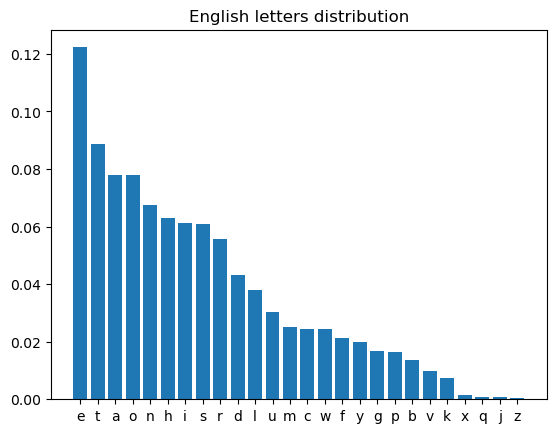

In [56]:
# Plot the English letters distribution
fig, ax = plt.subplots()
ax.bar(sorted_eng_letters_distr.keys(), sorted_eng_letters_distr.values())
ax.set_title('English letters distribution');

In [57]:
# Store the distribution as a pickle file
with open(file='english_letters_distr.pkl', mode='wb') as f:
    pickle.dump(sorted_eng_letters_distr, f)

#### Perform attack

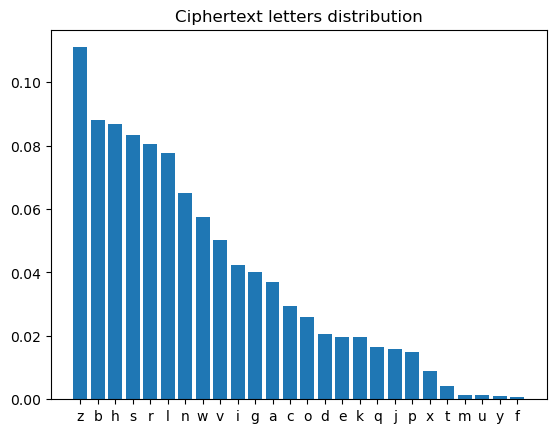

In [58]:
# Extract letters distribution of the ciphertext
cipher_letters_distr = letter_distribution(ciphertext_simple)

# Sort letters from the most common to the least common
sorted_cipher_letters_distr = dict(sorted(cipher_letters_distr.items(),
                                          key=lambda x:x[1], reverse=True))

# Plot ciphertext letters distribution
fig, ax = plt.subplots()
ax.bar(sorted_cipher_letters_distr.keys(),
       sorted_cipher_letters_distr.values())
ax.set_title('Ciphertext letters distribution');

In [59]:
# Build the mapping pairing equally placed letters of the two distributions
map_simple = {list(sorted_eng_letters_distr.keys())[i]:
    list(sorted_cipher_letters_distr.keys())[i] 
    for i in range(len(sorted_eng_letters_distr.keys()))}
map_simple    

{'e': 'z',
 't': 'b',
 'a': 'h',
 'o': 's',
 'n': 'r',
 'h': 'l',
 'i': 'n',
 's': 'w',
 'r': 'v',
 'd': 'i',
 'l': 'g',
 'u': 'a',
 'm': 'c',
 'c': 'o',
 'w': 'd',
 'f': 'e',
 'y': 'k',
 'g': 'q',
 'p': 'j',
 'b': 'p',
 'v': 'x',
 'k': 't',
 'x': 'm',
 'q': 'u',
 'j': 'y',
 'z': 'f'}

In [60]:
# Apply decryption function using the just establihsed mapping
plaintext_simple = substitution_decrypt(ciphertext_simple, map_simple)

# Create a .txt file with the decrypted plaintext
with open('plaintext_simple.txt', 'w') as f:
    f.write(plaintext_simple)

#### Adjustments

In [61]:
# Manual adjustments to refine the mapping
map_simple['s'], map_simple['r'] = map_simple['r'], map_simple['s']
map_simple['w'], map_simple['f'] = map_simple['f'], map_simple['w']
map_simple['c'], map_simple['u'] = map_simple['u'], map_simple['c']
map_simple['y'], map_simple['g'] = map_simple['g'], map_simple['y']
map_simple['g'], map_simple['p'] = map_simple['p'], map_simple['g']
map_simple['i'], map_simple['n'] = map_simple['n'], map_simple['i']
map_simple['d'], map_simple['l'] = map_simple['l'], map_simple['d']
map_simple['t'], map_simple['n'] = map_simple['n'], map_simple['t']
map_simple['c'], map_simple['d'] = map_simple['d'], map_simple['c']
map_simple['t'], map_simple['o'] = map_simple['o'], map_simple['t']
map_simple['w'], map_simple['g'] = map_simple['g'], map_simple['w']
map_simple['s'], map_simple['h'] = map_simple['h'], map_simple['s']
map_simple['s'], map_simple['o'] = map_simple['o'], map_simple['s']
map_simple['q'], map_simple['j'] = map_simple['j'], map_simple['q']
map_simple['q'], map_simple['z'] = map_simple['z'], map_simple['q']
map_simple

{'e': 'z',
 't': 's',
 'a': 'h',
 'o': 'l',
 'n': 'b',
 'h': 'v',
 'i': 'r',
 's': 'n',
 'r': 'w',
 'd': 'a',
 'l': 'i',
 'u': 'o',
 'm': 'c',
 'c': 'g',
 'w': 'j',
 'f': 'd',
 'y': 'q',
 'g': 'e',
 'p': 'k',
 'b': 'p',
 'v': 'x',
 'k': 't',
 'x': 'm',
 'q': 'f',
 'j': 'u',
 'z': 'y'}

In [62]:
# Reconstruct the correct plaintext and write it in a .txt file
plaintext_simple = substitution_decrypt(ciphertext_simple, map_simple)

with open('plaintext_simple.txt', 'w') as f:
    f.write(plaintext_simple)

## Vigenere Cipher

The **Vigenere Cipher** is an advanced form of the Simple Substitution Cipher. It operates by iteratively applying **Caesar shifts** based on a **keyword**, where each keyword letter determines the shift. This results in a more intricate ciphertext compared to the Simple Substitution Cipher, since identical plaintext letters may be encrypted differently. This makes this algorithm more resistant to classic frequency analysis attacks.

### Encryption


The encryption function of the Vigenère cipher begins by **replicating** the keyword to align it with the plaintext's length. Each letter in the keyword is then **converted** into a numerical shift, for example equal to its position in the alphabet. These shifts are applied cyclically to the plaintext letters following the typical Ceasar Cipher encryption function.

In [63]:
vigenere_shifts = {key: value for key, value in zip(alphabet, range(26))}

In [64]:
def vigenere_encrypt(plaintext, key):
    # Encrypt `plaintext` (str) as a vigenere cipher with a given `key` (str) 
    # Initialization of the letter index in the plaintext, without considering
    # non alphabetic characters
    idx = 0
    ciphertext = ''
    for plain_letter in plaintext:
        if plain_letter.isalpha():
            for remainder in range(len(key)):
                # Check which Ceasar Cipher the letter belongs to and identify
                # the shift to apply
                if idx % len(key) == remainder:
                    shift = vigenere_shifts[key[remainder]]
            # Apply Ceasar shift
            ciphertext += alphabet[
                (alphabet.index(plain_letter) + shift) % len(alphabet)]
            idx += 1
        else:
            # Add non-alphabetic character as is
            ciphertext += plain_letter
    return ciphertext

In [65]:
# Test the encryption function
plaintext = 'hello world!' 
ciphertext = vigenere_encrypt(plaintext, 'key')

# Expected output 'hello world! -> rijvs uyvjn!'
print(plaintext, '->', ciphertext)

hello world! -> rijvs uyvjn!


### Decryption

The decryption function of the Vigenere cipher reverses the encryption process. Firstly, the key is replicated to match the length of the ciphertext. Then, it's used to determine the **reverse** Caesar shift for each letter. These shifts are then applied to each letter of the ciphertext, revealing the original message.

In [66]:
def vigenere_decrypt(ciphertext, key):
    # Decrypt `plaintext` (str) as a vigenere cipher with a given `key` (str) 
    # Initialization of the letter index in the ciphertext, without considering
    # non alphabetic characters
    idx = 0
    plaintext = ''
    for cipher_letter in ciphertext:
        if cipher_letter.isalpha():
            for remainder in range(len(key)):
                # Check which Ceasar Cipher the letter belongs to and identify
                # the shift to apply
                if idx % len(key) == remainder:
                    shift = vigenere_shifts[key[remainder]]
            # Apply reverse Ceasar shift
            plaintext += alphabet[
                (alphabet.index(cipher_letter) - shift) % len(alphabet)]
            idx += 1
        else:
            # Add non-alphabetic character as is
            plaintext += cipher_letter
    return plaintext

In [67]:
# Test the decryption function
ciphertext = 'rijvs uyvjn!' 
plaintext = vigenere_decrypt(ciphertext, 'key')

# Expected output 'rijvs uyvjn! -> hello world!'
print(ciphertext, '->', plaintext)

rijvs uyvjn! -> hello world!


### Attack

The Vigenere Cipher eludes classic frequency-based approaches due to its multiple substitution alphabets, one per letter of the keyword. However, if the keyword length *l* is known, one can divide the ciphertext into *l* Caesar Ciphers and tackle them **separately**. Although brute force cannot be used in this case, a frequency attack on each cipher can reveal the Caesar shift and the corresponding keyword letter.
In our case the key length was given, but there exist various methods to deduce it.

In [68]:
# Load the ciphertext from the .txt file
with open('ciphertext_vigenere.txt', 'r') as f:
    ciphertext_vigenere = f.read()

In [69]:
key_length = 6
ciphertext_vigenere_only_letters = ''.join(
    char for char in ciphertext_vigenere if char.isalpha())

# Create as many Ceasar ciphers as the key length
ceasars = [''] * key_length
for idx, cipher_letter in enumerate(ciphertext_vigenere_only_letters):
    ceasars[idx % key_length] += cipher_letter

In [70]:
# Evaluation of letters distribution for each cipher
cipher_vigenere_dists = [letter_distribution(ceasar) for ceasar in ceasars]

# Sort letters from the most common to the least common
sorted_cipher_vigenere_dists = [dict(sorted(dist.items(), key=lambda x:x[1], 
                                            reverse=True)) 
                                for dist in cipher_vigenere_dists]

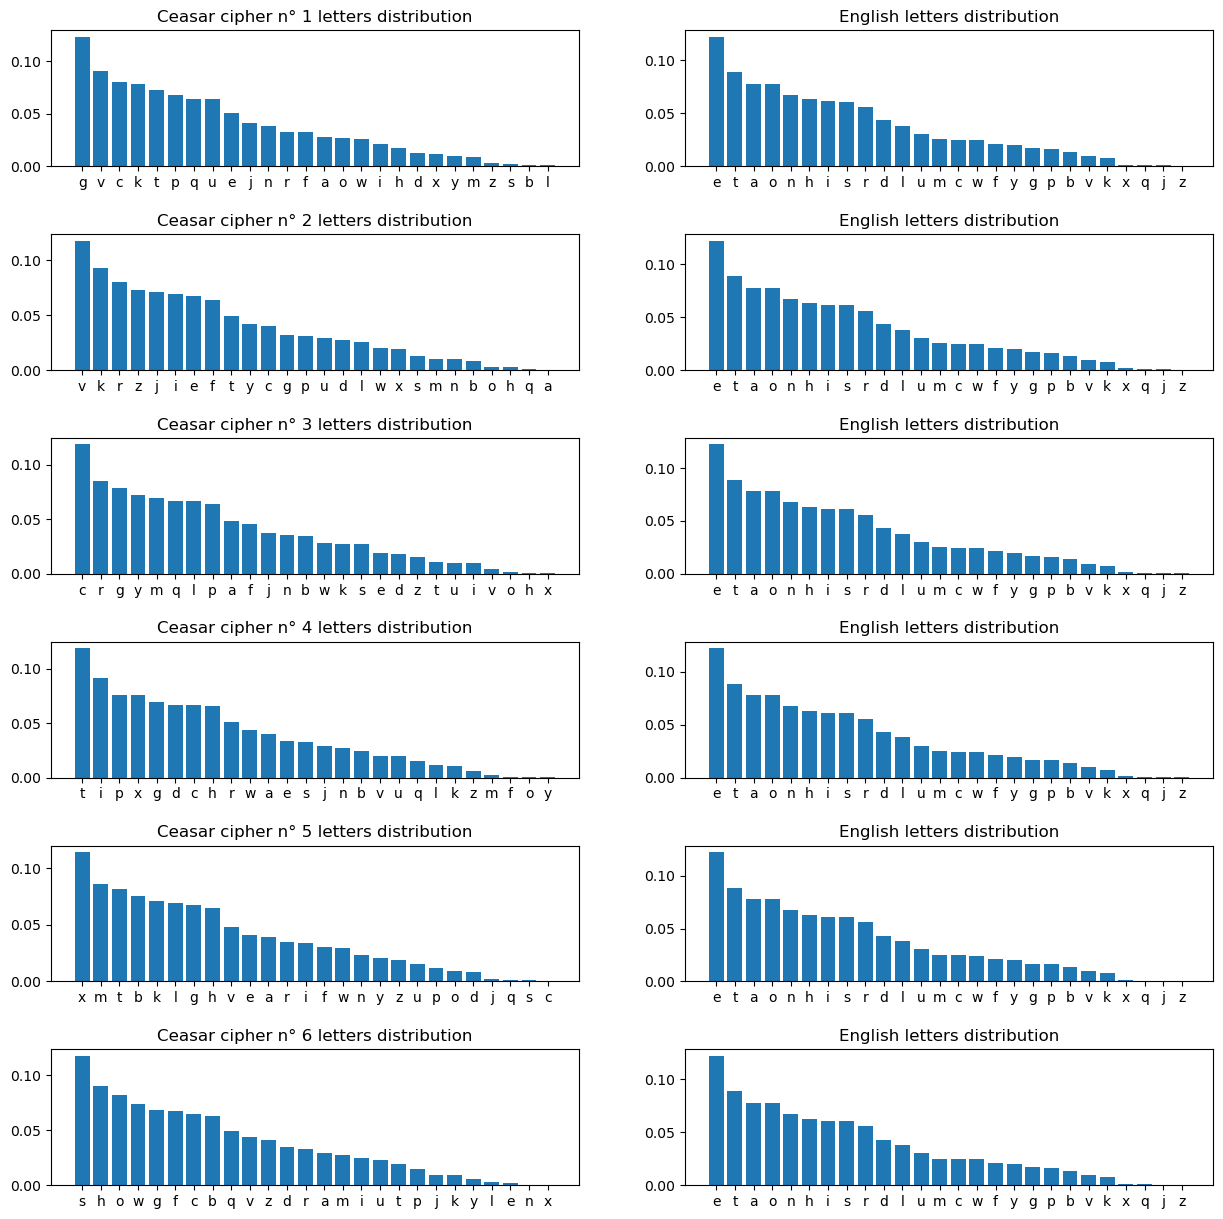

In [71]:
# Plot ciphers distributions next to the English distribution
fig, axes = plt.subplots(6, 2, figsize=(15,15))
for i in range(key_length):
    axes[i, 0].bar(sorted_cipher_vigenere_dists[i].keys(),
                sorted_cipher_vigenere_dists[i].values())
    axes[i, 0].set_title(f'Ceasar cipher n° {i+1} letters distribution')
    axes[i, 1].bar(sorted_eng_letters_distr.keys(),
                sorted_eng_letters_distr.values())
    axes[i, 1].set_title('English letters distribution')

# Adjust the vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)


In [72]:
# Extract the shifts comparing the most common letters of the ciphers with the 
# letter 'e'
key_shifts = [(alphabet.index(list(dist.keys())[0]) - alphabet.index('e')) % 26 
              for dist in sorted_cipher_vigenere_dists]

# Through the vigenere_shift dictionary, the letters corresponding to the 
# shifts are obtained
keyword = ''
for shift in key_shifts:
    keyword += list(vigenere_shifts.keys())[
        list(vigenere_shifts.values()).index(shift)]
print(f'The keyword is: {keyword}')

The keyword is: crypto


In [73]:
# Apply decryption function using the just found keyword
plaintext_vigenere = vigenere_decrypt(ciphertext_vigenere, keyword)

# Write the decrypted plaintext in a .txt file
with open('plaintext_vigenere.txt', 'w') as f:
    f.write(plaintext_vigenere)

## Conclusion

By implementing and breaking the Caesar, Simple Substitution, and Vigenère ciphers, several conclusions emerged:
- These classical ciphers offer basic encryption mechanisms that are easy to understand and implement. 
- They are vulnerable to cryptanalysis techniques such as brute force and frequency analysis, highlighting their lack of robustness in modern security contexts.
  - The brute force attack underscore the importance of using keys with sufficient complexity to resist exhaustive search methods.
  - Frequency analysis demonstrates the need for encryption methods that do not preserve natural language patterns. 

Overall, while these ciphers serve as useful learning tools, real-world applications need more sophisticated cryptographic techniques to ensure secure communication.
This project highlights how important is the evolution of cryptography is in modern information security.

## References

- [Substitution Cipher](https://en.wikipedia.org/wiki/Substitution_cipher)
- [Ceasar Cipher](https://en.wikipedia.org/wiki/Caesar_cipher)
- [Brute force attack](https://en.wikipedia.org/wiki/Brute-force_attack)
- [Frequency Analysis](https://en.wikipedia.org/wiki/Frequency_analysis)
- [Vigenere Cipher](https://en.wikipedia.org/wiki/Vigen%C3%A8re_cipher)